# Task 1: Classification Analysis

Alex Rivera ID#011243153

Western Governors University

D209 - Data Mining  I 

October 01, 2023

## A1: Proposal Of Question

The research question for this project is, "Can the classification method k-nearest neighbor significantly predict customer churn?"

## A2: Defined Goal

The goal of this analysis is to get a better understanding of the factors that assist in predicting customer churn. The insight from data analysis will shed light on the factors are due to customer characteristics or service add-ons the company offers. With these insights, a strategy can be put in place to mitigate the risk of customer churn according to these factors. 

## B1: Explanation Of Classification Method

The classification method k-nearest neighbor is a straightforward algorithm that works by predicting a label of a data point by looking at the "k" closest labels of a dataset. K-nearest neighbor works by first selecting the number K of the neighbors to review. Calculating the Euclidean distances of the K neighbors. Sort and take the K closest neighbors from the calculated distances. From these neighbors, the labels will be counted for each of the categories and finally assigned the category of the max of the K neighbors. The model is now ready and the accuracy of the model can be reviewed. The expected outcome of the model is to get as closest to the 95% threshold without overfitting, this is done through hyperparameter tuning discussed later in the analysis. A Javapoint article provided a high-level overview and example of the data point example below (K-Nearest Neighbor(KNN) algorithm for Machine Learning, 2023).

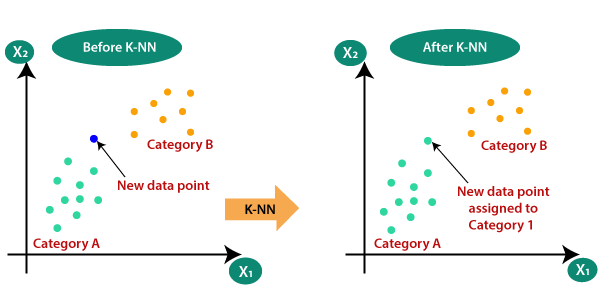

## B2: Summary Of Method Assumption

The main assumption for k-nearest neighbor according to Nelson is, that "data points/instances which exist in close proximity to each other are highly similar" (Nelson, 2020). According to this assumption, the opposite can also be assumed that data points far away from one another are dissimilar. These assumptions make the algorithm easy to implement. 

## B3: Packages Or Libraries List

* **Pandas** library will be used for data manipulation and analysis throughout the project. 
    * CategoricalDtype Pandas class will be used for converting data types to categorical. 
* **Numpy** library will be used for working with arrays and data analysis throughout the project. 
* **Matplotlib** will used for visualizing the model complexity curve. 
* **Sklearn** is a machine learning library that will be used to implement k-nearest neighbor.  
    * MinMaxScaler Sklearn class will be used for normalizing data from 0-1 in preprocessing.  
    * train_test_split Sklearn class will be used for splitting the data into training and testing datasets. 
    * SelectKBest Sklearn class will be used for selecting the best features by the K highest scores. 
    * f_classif Sklearn class will be used for computing the ANOVA F-value used in the models. 
    * KNeighborsClassifier Sklearn class will be used for implementing the k-nearest neighbors vote. 
    * GridSearchCV Sklearn class will be used for running through parameters to find the best parameter.
    * confusion_matrix Sklearn class will be used for computing the confusion matrix to evaluate the accuracy of the classification.
    * ConfusionMatrixDisplay Sklearn class will be used for visualization of the confusion matrix.
    * roc_auc_score Sklearn class will be used for computing the area under the curve.
    * classification_report Sklearn class will be used for displaying the classification metrics report. 
* **Statsmodels** library will used to check for multicollinearity while creating the classification model. 

In [1]:
#Importing necessary packages for the Classification Analysis project 
import pandas as pd 
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

## C1: Data Preprocessing

is one hot encoding. Ganji's article went over the reasons for implementing it, "One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model"(Ganji, 2023). Since machine learning models take in numerical data all categorical data needs to be converted to either 0 or 1. For binary categorical data, this encoding was straightforward by implementing the following function to the dataframe replace('Yes', 1) and replace('No', 0). For categorical data with more than two steps creating dummies for each category was necessary. For example, the get_dummies(data=knn_churn["gender"]) allowed the gender categorical variables to create three separate columns for Male_Gender, Female_Gender, and Nonbinary_Gender all with numerical data. All new columns were inserted into the new dataframe and the original variable nonnumerical was dropped, this data can now be implemented into the k-nearest neighbor method. 

## C2: Data Set Variables

* Categorical: Churn
* Continuous: Children
* Continuous: Age
* Continuous: Income
* Categorical: Marital
* Categorical: Gender
* Categorical: Outage_sec_perweek
* Categorical: Yearly_equip_failure
* Categorical: Techie
* Categorical: Port_modem
* Categorical: InternetService
* Categorical: OnlineSecurity
* Categorical: OnlineBackup
* Categorical: DeviceProtection
* Categorical: TechSupport
* Categorical: StreamingTV
* Categorical: StreamingMovies
* Continuous: Tenure
* Continuous: MonthlyCharge
* Continuous: Bandwidth_GB_Year

## C3: Steps For Analysis

#### Loading the churn dataset flat file into a pandas dataframe and running info() for an overview.

In [2]:
churn = pd.read_csv('C:/Users/alexa/WGU/D209/Project/churn_clean.csv', index_col=0)

churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

#### Setting options to view max columns for review during data cleaning and viewing dataframe.

In [3]:
pd.set_option("display.max_columns", None)

churn

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5


#### Detecting duplicates and checking if Customer_id is unique. 

In [4]:
print(churn.duplicated().value_counts())

churn['Customer_id'].is_unique

False    10000
dtype: int64


True

#### Detecting null values in the dataframe.

In [5]:
churn.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

#### Running a block of code to change column types to categorical or boolean and replace text to match the dataset dictionary. 

In [6]:
churn["Area"] = churn["Area"].astype("category")
churn.TimeZone.replace({
    "America/Anchorage" : "Alaska Time Zone",
    "America/Juneau" : "Alaska Time Zone",
    "America/Nome" : "Alaska Time Zone",
    "America/Sitka" : "Alaska Time Zone",
    "America/Puerto_Rico" : "Atlantic Time Zone",
    "America/Chicago" : "Central Time Zone",
    "America/Indiana/Knox" : "Central Time Zone",
    "America/Indiana/Tell_City" : "Central Time Zone",
    "America/Menominee" : "Central Time Zone",
    "America/North_Dakota/New_Salem" : "Central Time Zone",
    "America/Detroit" : "Eastern Time Zone",
    "America/Indiana/Indianapolis" : "Eastern Time Zone",
    "America/Indiana/Marengo" : "Eastern Time Zone",
    "America/Indiana/Petersburg" : "Eastern Time Zone",
    "America/Indiana/Vincennes" : "Eastern Time Zone",
    "America/Indiana/Winamac" : "Eastern Time Zone",
    "America/Kentucky/Louisville" : "Eastern Time Zone",
    "America/New_York" : "Eastern Time Zone",
    "America/Toronto" : "Eastern Time Zone",
    "Pacific/Honolulu" : "Hawaii-Aleutian Time Zone",
    "America/Boise" : "Mountain Time Zone",
    "America/Denver" : "Mountain Time Zone",
    "America/Ojinaga" : "Mountain Time Zone",
    "America/Phoenix" : "Mountain Time Zone",
    "America/Los_Angeles" : "Pacific Time Zone"
    }, inplace=True)
churn["TimeZone"] = churn["TimeZone"].astype("category")
churn["Marital"] = churn["Marital"].astype("category")
churn.Gender.replace("Prefer not to answer","Nonbinary", inplace=True)
churn["Gender"] = churn["Gender"].astype("category")
churn["InternetService"] = churn["InternetService"].astype("category")
churn["PaymentMethod"] = churn["PaymentMethod"].astype("category")
churn["Item1"] = churn["Item1"].astype("category")
churn["Item2"] = churn["Item2"].astype("category")
churn["Item3"] = churn["Item3"].astype("category")
churn["Item4"] = churn["Item4"].astype("category")
churn["Item5"] = churn["Item5"].astype("category")
churn["Item6"] = churn["Item6"].astype("category")
churn["Item7"] = churn["Item7"].astype("category")
churn["Item8"] = churn["Item8"].astype("category")

#### Renaming survey coulmns appropriately.

In [7]:
churn.rename(columns={
    'Item1' : 'timely_response',
    'Item2' : 'timely_fixes',
    'Item3' : 'timely_replacements',
    'Item4' : 'reliability',
    'Item5' : 'options',
    'Item6' : 'respectful_response',
    'Item7' : 'courteous_exchange',
    'Item8' : 'evidence_of_active_listening'
}, inplace=True)

#### Creating dataframe with variables needed for analysis and reviewing dataframe. 

In [8]:
knn_churn = churn[["Churn","Children","Age","Income","Marital","Gender","Outage_sec_perweek","Yearly_equip_failure","Techie","Port_modem","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Tenure","MonthlyCharge","Bandwidth_GB_Year"]]

knn_churn

,Churn,Children,Age,Income,Marital,Gender,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,,,,,,,,
1,No,0,68,28561.99,Widowed,Male,7.978323,1,No,Yes,Fiber Optic,Yes,Yes,No,No,No,Yes,6.795513,172.455519,904.536110
2,Yes,1,27,21704.77,Married,Female,11.699080,1,Yes,No,Fiber Optic,Yes,No,No,No,Yes,Yes,1.156681,242.632554,800.982766
3,No,4,50,9609.57,Widowed,Female,10.752800,1,Yes,Yes,DSL,No,No,No,No,No,Yes,15.754144,159.947583,2054.706961
4,No,1,48,18925.23,Married,Male,14.913540,0,Yes,No,DSL,Yes,No,No,No,Yes,No,17.087227,119.956840,2164.579412
5,Yes,0,83,40074.19,Separated,Male,8.147417,1,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,No,3,23,55723.74,Married,Male,9.415935,0,No,Yes,DSL,No,Yes,Yes,No,No,No,68.197130,159.979400,6511.252601
9997,No,4,48,34129.34,Divorced,Male,6.740547,0,No,No,Fiber Optic,Yes,Yes,Yes,No,Yes,No,61.040370,207.481100,5695.951810
9998,No,1,48,45983.43,Never Married,Female,6.590911,0,No,No,Fiber Optic,Yes,Yes,No,No,No,No,47.416890,169.974100,4159.305799


#### Reviewing distribution of Churn.

In [9]:
knn_churn["Churn"].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

#### Finding and replacing yes/no values to 1/0. 

In [10]:
#Article refernced for code (Moffitt, 2017)
knn_churn = knn_churn.replace('Yes', 1)
knn_churn = knn_churn.replace('No', 0)

#### Creating dummies for Marital, Gender, and Internet Service.

In [11]:
#Article referenced for code (Ebner, 2022) 
Marital = pd.get_dummies(data=knn_churn["Marital"])

Marital.rename(columns={"Divorced": "Divorced_Martial","Married": "Married_Martial", "Never Married":"Never_Married_Martial", "Separated":"Separated_Martial", "Widowed":"Widowed_Martial"}, inplace = True)

#Article referenced for code (Ebner, 2022) 
Gender = pd.get_dummies(data=knn_churn["Gender"])

Gender.rename(columns={"Male": "Male_Gender","Female": "Female_Gender", "Nonbinary":"Nonbinary_Gender"}, inplace = True)

#Article referenced for code (Ebner, 2022) 
InternetService = pd.get_dummies(data=knn_churn["InternetService"])

InternetService.rename(columns={"DSL": "Internet_DSL","Fiber Optic": "Internet_Fiber_Optic", "None":"Internet_None"}, inplace = True)

#### Inserting dummy values into dataframe and dropping original non-dummies columns.

In [12]:
#Inserting Marital dummies into regress_churn dataframe
knn_churn.insert(5, "Divorced_Martial", Marital.Divorced_Martial)
knn_churn.insert(5, "Married_Martial", Marital.Married_Martial)
knn_churn.insert(5, "Never_Married_Martial", Marital.Never_Married_Martial)
knn_churn.insert(5, "Separated_Martial", Marital.Separated_Martial)
knn_churn.insert(5, "Widowed_Martial", Marital.Widowed_Martial)

#Inserting Gender dummies into regress_churn dataframe
knn_churn.insert(5, "Male_Gender", Gender.Male_Gender)
knn_churn.insert(5, "Female_Gender", Gender.Female_Gender)
knn_churn.insert(5, "Nonbinary_Gender", Gender.Nonbinary_Gender)

#Inserting Internet Service dummies into regress_churn dataframe
knn_churn.insert(5, "Internet_None", InternetService.Internet_None)
knn_churn.insert(5, "Internet_DSL", InternetService.Internet_DSL)
knn_churn.insert(5, "Internet_Fiber_Optic", InternetService.Internet_Fiber_Optic)

#Dropping original non-dummies columns 
knn_churn.drop(columns=['Marital'],inplace=True)
knn_churn.drop(columns=['Gender'],inplace=True)
knn_churn.drop(columns=['InternetService'],inplace=True)

#### Normalizing values to 0-1.

In [13]:
#MinMaxScaler article referenced for code (Sabu, 2022)
scaler = MinMaxScaler()
knn_churn[['Children','Age','Income','Outage_sec_perweek','Yearly_equip_failure','Bandwidth_GB_Year','Tenure','MonthlyCharge']] = scaler.fit_transform(knn_churn[['Children','Age','Income','Outage_sec_perweek','Yearly_equip_failure','Bandwidth_GB_Year','Tenure','MonthlyCharge']])

knn_churn

,Churn,Children,Age,Income,Internet_Fiber_Optic,Internet_DSL,Internet_None,Nonbinary_Gender,Female_Gender,Male_Gender,Widowed_Martial,Separated_Martial,Never_Married_Martial,Married_Martial,Divorced_Martial,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0.704225,0.109120,1,0,0,0,0,1,1,0,0,0,0,0.373260,0.166667,0,1,1,1,0,0,0,1,0.081624,0.439985,0.106951
2,1,0.1,0.126761,0.082599,1,0,0,0,1,0,0,0,0,1,0,0.549537,0.166667,1,0,1,0,0,0,1,1,0.002203,0.773872,0.092165
3,0,0.4,0.450704,0.035818,0,1,0,0,1,0,1,0,0,0,0,0.504705,0.166667,1,1,0,0,0,0,0,1,0.207804,0.380474,0.271180
4,0,0.1,0.422535,0.071848,0,1,0,0,0,1,0,0,0,1,0,0.701827,0.000000,1,0,1,0,0,0,1,0,0.226580,0.190207,0.286868
5,1,0.0,0.915493,0.153646,1,0,0,0,0,1,0,1,0,0,0,0.381271,0.166667,0,1,0,0,0,1,1,0,0.009447,0.332900,0.016561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0.3,0.070423,0.214174,0,1,0,0,0,1,0,0,0,1,0,0.441369,0.000000,0,1,0,1,1,0,0,0,0.946448,0.380626,0.907513
9997,0,0.4,0.422535,0.130653,1,0,0,0,0,1,0,0,0,0,1,0.314618,0.000000,0,0,1,1,1,0,1,0,0.845647,0.606629,0.791099
9998,0,0.1,0.422535,0.176501,1,0,0,0,1,0,0,0,1,0,0,0.307529,0.000000,0,0,1,1,0,0,0,0,0.653764,0.428179,0.571688


#### SelectKBest feature selection code below.

In [14]:
# Assign values to X for all predictor features
# Assign values to y for the dependent variable
X = knn_churn.drop(["Churn"],1)
y = knn_churn["Churn"]

feature_names = X.columns

# Initialize the class and call fit_transform (Elleh, 2023)
skbest = SelectKBest(score_func = f_classif, k='all') # k= features
X_new = skbest.fit_transform(X, y)

### Finding P-values to select statistically significant features (Elleh, 2023)
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value'] < .05]

features_to_keep = p_values['Feature'][p_values['p_value'] < .05]
# Print the name of the selected features
features_to_keep

C:\Users\alexa\AppData\Local\Temp\ipykernel_820\2745314105.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = knn_churn.drop(["Churn"],1)


26       Bandwidth_GB_Year
25           MonthlyCharge
24                  Tenure
23         StreamingMovies
22             StreamingTV
4             Internet_DSL
16                  Techie
3     Internet_Fiber_Optic
20        DeviceProtection
19            OnlineBackup
5            Internet_None
8              Male_Gender
7            Female_Gender
Name: Feature, dtype: object

#### Checking for multicollinearity VIF >10. 

In [15]:
#Episode 1 coding was referenced (Sewell, 2023)
#the independent variables set
X = knn_churn[["Female_Gender","Male_Gender","Internet_None","OnlineBackup","DeviceProtection","Internet_Fiber_Optic","Techie","Internet_DSL","StreamingTV","StreamingMovies","Tenure","MonthlyCharge","Bandwidth_GB_Year"]]

#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature         VIF
0          Female_Gender   11.340765
1            Male_Gender   11.485725
2          Internet_None   11.173155
3           OnlineBackup    1.378554
4       DeviceProtection    1.180682
5   Internet_Fiber_Optic   24.588037
6                 Techie    1.000930
7           Internet_DSL   22.473104
8            StreamingTV    2.601118
9        StreamingMovies    3.020418
10                Tenure  440.054132
11         MonthlyCharge    5.731204
12     Bandwidth_GB_Year  447.243194


#### Checking for multicollinearity VIF >10 elimated Female_Gender, Male_Gender, Internet_None, Internet_Fiber_Optic, Internet_DSL, Tenure, Bandwidth_GB_Year.

In [16]:
#Episode 1 coding was referenced (Sewell, 2023)

#the independent variables set
X = knn_churn[["OnlineBackup","DeviceProtection","Techie","StreamingTV","StreamingMovies","MonthlyCharge"]]

#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

            feature        VIF
0      OnlineBackup   2.209254
1  DeviceProtection   1.841111
2            Techie   1.169320
3       StreamingTV   3.541022
4   StreamingMovies   4.312085
5     MonthlyCharge  13.855761


#### Checking for multicollinearity VIF >10 elimated MonthlyCharge. 

In [17]:
#Episode 1 coding was referenced (Sewell, 2023)

#the independent variables set
X = knn_churn[["OnlineBackup","DeviceProtection","Techie","StreamingTV","StreamingMovies"]]

#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0      OnlineBackup  1.504955
1  DeviceProtection  1.512551
2            Techie  1.155506
3       StreamingTV  1.552530
4   StreamingMovies  1.563190


## C4: Cleaned Data Set

The KNN_Prepared_Data CSV was submitted along with the project.

In [18]:
#Creating dataframe for saving prepared dataset
knn_churn_save = X.copy()
knn_churn_save.insert(5, column="Churn", value=y.reset_index().drop('CaseOrder', axis=1))

#Save prepared KNN dataset to CSV 
knn_churn_save.to_csv('C:/Users/alexa/WGU/D209/Project/KNN_Prepared_Data.csv', index=False)

## D1: Splitting The Data

The X_train_Data, X_test_Data, y_train_Data, y_test_Data CSV files were submitted along with the project.

In [19]:
#Splitting the data 80% / 20% (Elleh, 2023)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15, stratify=y)

#Save training and test files to provide 
X_train.to_csv('C:/Users/alexa/WGU/D209/Project/X_train_Data.csv', index=False)
X_test.to_csv('C:/Users/alexa/WGU/D209/Project/X_test_Data.csv', index=False)
y_train.to_csv('C:/Users/alexa/WGU/D209/Project/y_train_Data.csv', index=False)
y_test.to_csv('C:/Users/alexa/WGU/D209/Project/y_test_Data.csv', index=False)

## D2: Output And Intermediate Calculations

Now that the data has been cleaned, processed, and split into two sets the analysis can be applied to the dataset. As discussed in section B1 the classification method k-nearest neighbor will be implemented to predict customer churn on the chosen variables. The first step of the k-nearest neighbor previously discussed is choosing the number of K-neighbor labels to review when applying the algorithm. With the guidance of the article by Allibhai, I implemented the steps needed to run GridSearchCV. This critical step assisted in hypertunning the model for the best parameter to run the k-nearest neighbor(Allibhai, 2018). The GridSearchCV function was fed parameters from 1-50 and it ran through all the parameters on the training dataset to output n_neighbors = 43 as the best parameter with a score of 0.756. To run the KNN model I followed an example found in Task 1 Cohort (Elleh, 2023) the n_neighbors = 43 was inputted into the KNeighborsClassifier function to run the model on the test dataset, and the score of the test data set was 0.7625. Now that the k-nearest neighbor model has been implemented the next step in the analysis is to compare the performance of the model a confusion matrix, area under the curve(AUC), model complexity curve, and classification report were implemented on the y_test and y_predicted as seen below. The results of the outputs will be discussed in further detail in section E1.

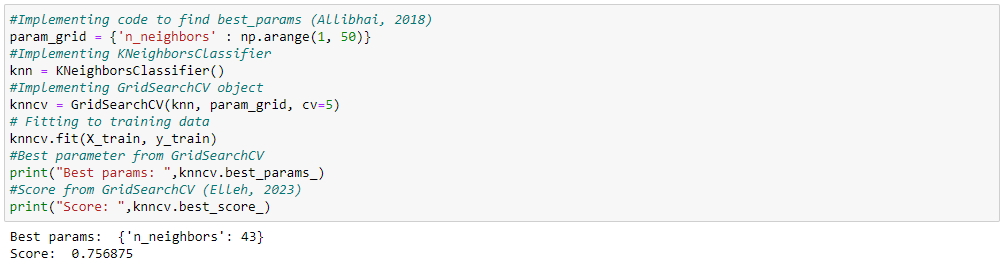
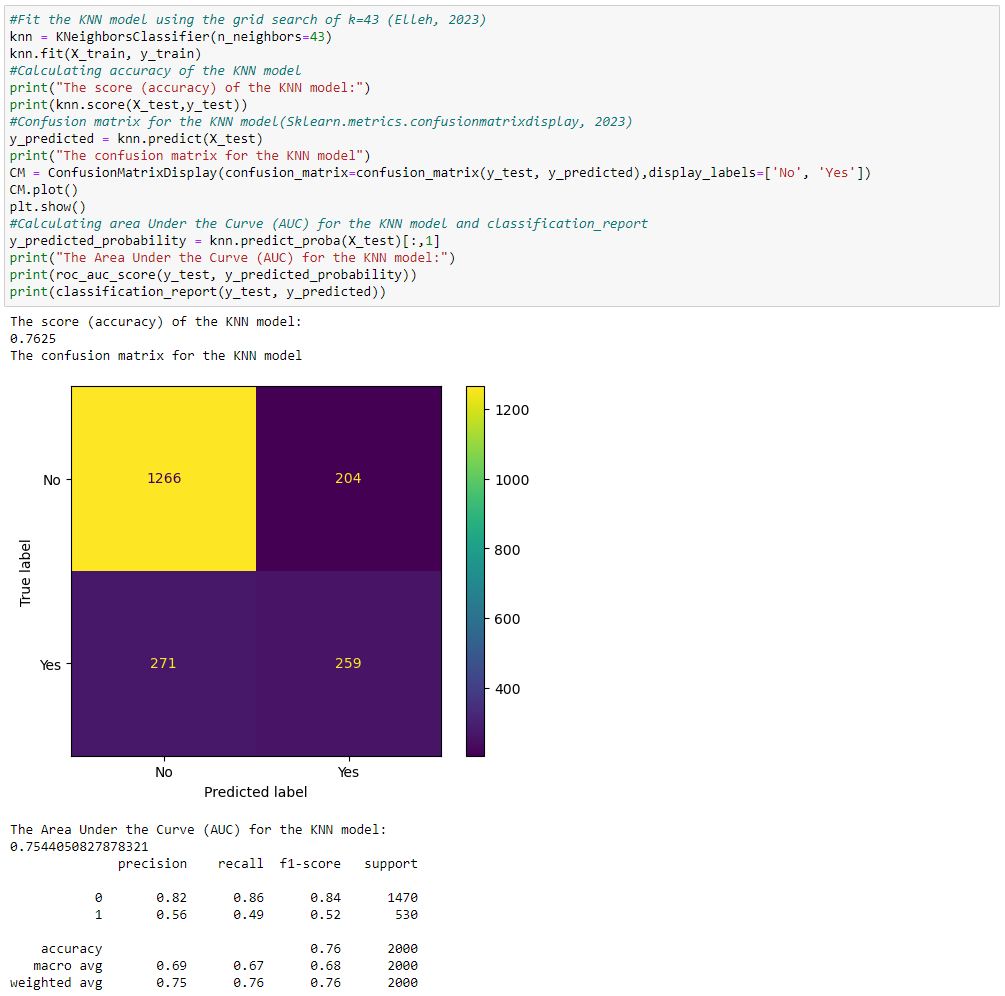
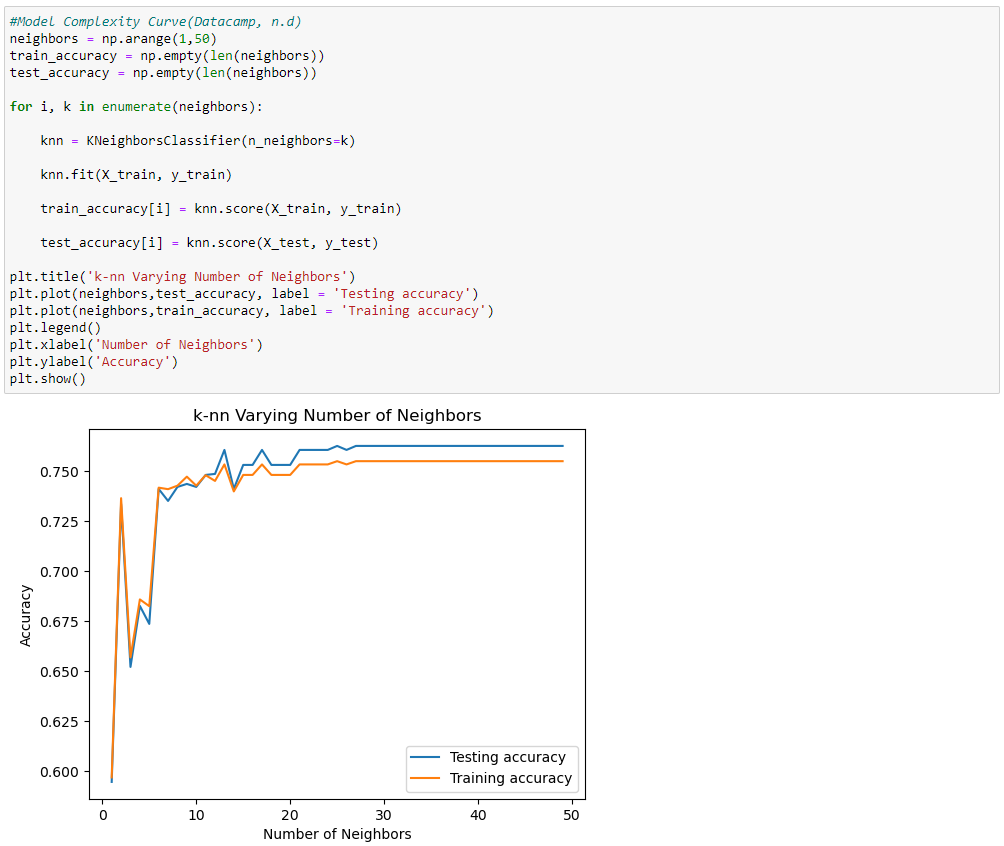

## D3: Code Execution

In [20]:
#Implementing code to find best_params (Allibhai, 2018)
param_grid = {'n_neighbors' : np.arange(1, 50)}
#Implementing KNeighborsClassifier
knn = KNeighborsClassifier()
#Implementing GridSearchCV object
knncv = GridSearchCV(knn, param_grid, cv=5)
# Fitting to training data
knncv.fit(X_train, y_train)
#Best parameter from GridSearchCV
print("Best params: ",knncv.best_params_)
#Score from GridSearchCV (Elleh, 2023)
print("Score: ",knncv.best_score_)

Best params:  {'n_neighbors': 43}
Score:  0.756875


The score (accuracy) of the KNN model:
0.7625
The confusion matrix for the KNN model


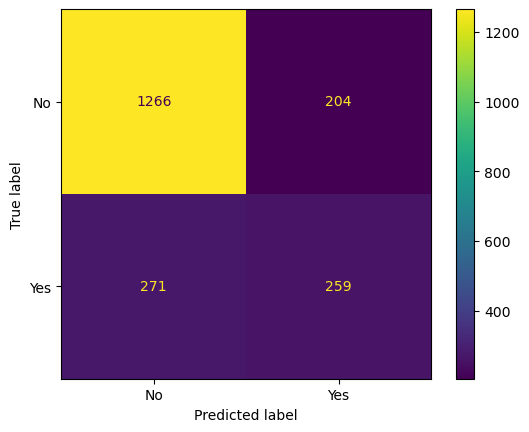

The Area Under the Curve (AUC) for the KNN model:
0.7544050827878321
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1470
           1       0.56      0.49      0.52       530

    accuracy                           0.76      2000
   macro avg       0.69      0.67      0.68      2000
weighted avg       0.75      0.76      0.76      2000



In [21]:
#Fit the KNN model using the grid search of k=43 (Elleh, 2023)
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train, y_train)
#Calculating accuracy of the KNN model
print("The score (accuracy) of the KNN model:")
print(knn.score(X_test,y_test))
#Confusion matrix for the KNN model(Sklearn.metrics.confusionmatrixdisplay, 2023)
y_predicted = knn.predict(X_test)
print("The confusion matrix for the KNN model")
CM = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predicted),display_labels=['No', 'Yes'])
CM.plot()
plt.show()
#Calculating area Under the Curve (AUC) for the KNN model and classification_report
y_predicted_probability = knn.predict_proba(X_test)[:,1]
print("The Area Under the Curve (AUC) for the KNN model:")
print(roc_auc_score(y_test, y_predicted_probability))
print(classification_report(y_test, y_predicted))

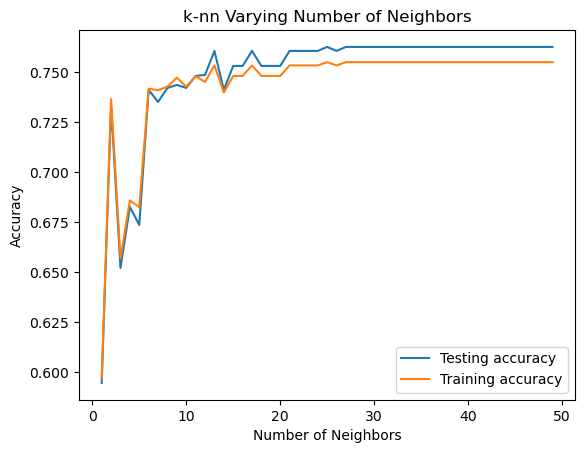

In [22]:
#Model Complexity Curve(Datacamp, n.d)
neighbors = np.arange(1,50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-nn Varying Number of Neighbors')
plt.plot(neighbors,test_accuracy, label = 'Testing accuracy')
plt.plot(neighbors,train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## E1: Accuracy And Auc

To explain the accuracy of the k-nearest neighbor model I will start by defining accuracy, "We can define accuracy as the ratio of the number of correct predictions and the total number of predictions"(Agrawal, 2023). The accuracy of the model was 0.7625 in predicting customer churn. Accuracy is a metric dealing with total predictions of both labels, to analyze the accuracy of each label precision will need to be reviewed. To define precision, "Precision for a label is defined as the number of true positives divided by the number of predicted positives" (Agrawal, 2023). Precision highlights the differences between true and false labels, true having a precision of 0.56 and false having a precision of 0.82. The higher precision for not churning is expected as the original churn variable for not churning had a distribution of 73%. The area under the curve (AUC) is defined as:

    When AUC is equal to 1, the classifier is able to perfectly distinguish between all Positive and Negative class points. When AUC is equal to 0, the classifier would be predicting all Negatives as Positives and vice versa. When AUC is 0.5,  the classifier is not able to distinguish between the Positive and Negative classes (Agrawal, 2023).
    
The area under the curve score for the model was 0.754, this was straight down the middle of being able to predict all labels and the model predicting labels at random. 

## E2: Results And Implications

The implementation of the k-nearest neighbor algorithm was a straightforward classification process that solved for results quickly. The accuracy of the model was 0.7625 after selecting the SelectKBest features and hyper-tuning with n_neighbors = 43. The implications of applying both of those steps make me conclude that the performance is as good as it gets with the given dataset. Reviewing the analysis report outputs leads me to believe a larger set could possibly assist in the precision score of churning yes customers, this could only be concluded with further data as the current distribution is 73% not churning samples. Compared to the previous logitics regression classification model it was a decrease of 0.0758 in accuracy. 

## E3: Limitation

One major limitation highlighted while reviewing the dependent variable of churn as it had a distribution of 73.5% observations of 10,000 as No and the rest as Yes. The precision of no classification had a precision score of 0.82 for no and 0.56 for yes. I believe the distribution of this data has a lot to do with these scores and could be biased in the classification. 

## E4: Course Of Action

Through the analysis I can now answer the project question, "Can the classification method k-nearest neighbor significantly predict customer churn?" Yes, it can predict customer churn but further analysis would be needed on a large sample size of both yes and no-churning customers. With a decrease from the previous classification logistic model, I can't recommend the company put this into production or make informed decisions from the outputs. The overall accuracy was in a ballpark useful but yes churning customers had a lower sample size which could possibly lead to the wrong classification. With further analysis, this can be tested if this could lead to higher precision for both labels.  


## F: Panopto Recording
 
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9f6cb46a-9244-4d69-9816-b08f001d5183 

## G: Sources For Third-Party Code

Allibhai, J. (2018, October 2). Building a K-nearest-neighbors (K-nn) model with Scikit-Learn. Medium. https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a 

Datacamp. (n.d). Supervised Learning with scikit-learn. https://learn.datacamp.com/courses/supervised-	learning-with-scikit-learn 

Ebner, J. (2022, March 29). How to use pandas get dummies in python. Sharp Sight. https://www.sharpsightlabs.com/blog/pandas-get-dummies/ 

Elleh, F. (2023, August). D209 Data Mining 1 Task 1 Cohort. my.wgu.edu. Retrieved September 16, 2023, from https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D209/Student%20Facing%20Resources/D209%20Data%20Mining%201%20Task%201%20Cohort.pptx?d=w945f58a7b99e4d7abec09bb216b4d2bd&csf=1&web=1&e=0f7fEe

Moffitt, C. (2017, February 6). Guide to encoding categorical values in&nbsp;python. Practical Business Python Atom. https://pbpython.com/categorical-encoding.html 

Rivera, Alex. (2023). Task 2: Logistic Regression Modeling. Unpublished manuscript, Western Governors University.

Sabu, H. (2022, February 3). Data pre-processing with Sklearn using standard and Minmax Scaler. GeeksforGeeks. https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/ 

Sewell, W. (2023a, July). D208 predictive modeling webinar - Episode 1. my.wgu.edu. Retrieved August 27, 2023, from https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D208/Student%20Facing%20Resources/Dr.%20Sewell%20D208_Predictive_Modeling_Webinar_Episode%201t.pptx?d=w285c378f808947589abe29976d079b56&amp;csf=1&amp;web=1&amp;e=EDZkfD. 

Sklearn.metrics.confusionmatrixdisplay. scikit. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html 

## H: Sources

Agrawal, S. K. (2023, September 29). Metrics to evaluate your classification model to take the right decisions. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/ 

Ganji, L. (2023, April 18). One hot encoding in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/# 

K-Nearest Neighbor(KNN) algorithm for Machine Learning - Javatpoint. www.javatpoint.com. (n.d.). https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning 

Nelson, D. (2020, August 23). What is a KNN (K-nearest neighbors)?. Unite.AI. https://www.unite.ai/what-is-k-nearest-neighbors/ 

Rivera, Alex. (2023). Task 2: Logistic Regression Modeling. Unpublished manuscript, Western Governors University.

Using and interpreting indicator (dummy) variables¶. Using and Interpreting Indicator (Dummy) Variables - Unifying Data Science. (n.d.). https://www.unifyingdatascience.org/html/interpreting_indicator_vars.html 
